# Foundations of Data Mining: Assignment 4

Please complete all assignments in this notebook. You should submit this notebook, as well as a PDF version (See File > Download as).

In [1]:
%matplotlib inline
from preamble import *
plt.rcParams['savefig.dpi'] = 100 # This controls the size of your figures
# Comment out and restart notebook if you only want the last output of each cell.
InteractiveShell.ast_node_interactivity = "all"

## Backpropagation (3 points)

Figure 1 illustrates a simple neural network model.

![Figure 1](images/assignment/small-net.png)

It has single input $x$, two layers with one neuron each. The activation function of both layers is ReLU. 

The parameters $w_0$ and $w_1$ (no biases) are initialized to the following values $w_0 = 1$ and $w_1 = 2$. Implement a single update step of the gradient descent algorithm by hand. Run the update state for the following two data points:

* $(1, 2)$ 
* $(2, 3)$

The goal is to model the relationship between two continuous variables. The learning rate is set to $0.1$

Provide the solution in the following format:

- A choice for a loss function 
- Compute graph for training the neural network
- Partial derivative expression for each of the parameters in the model
- The update expression for each of the parameters for each of the data-points
- The final value of both parameters after the single step in the gradient descent algorithm

We will use the Mean square error loss function $L = \frac{1}{2n}\sum_{i=0}^{n}{(\hat{y} - y)^2}$.

Compute graph:  
For data point (1,2)
![Figure 2](images/assignment/fig1.png)
For data point (2,3)
![Figure 3](images/assignment/fig2.png)

Partial derivative expression for each of the parameters in the model:  
$\frac{\partial}{\partial w}{L} = x \cdot (w \cdot x-y)$  
$\frac{\partial}{\partial b}{L} = 0$  

The update expression for each of the parameters for each of the data-points:
$$w \gets w - \alpha x \cdot (w \cdot x-y)$$ 
$$b \gets b$$ 

The final value of both parameters after the single step in the gradient descent algorithm:  
For data point (1,2)
$$w \gets 1 - 0.1 \cdot 1 \cdot (1 \cdot 1-2)$$ 
$$w \gets 1.1$$  
$$b \gets 0$$
For data point (2,3)
$$w \gets 1 - 0.1 \cdot 1 \cdot (2 \cdot 2-3)$$ 
$$w \gets 1 - 0.1 \cdot 1 \cdot 1$$ 
$$w \gets 0.8$$  
$$b \gets 0$$

## Training Deep Models (3 points)

The model in the example code below performs poorly as its depth increases. Train this model on the MNIST digit detection task. 

Examine its training performance by gradually increasing its depth:
- Set the depth to 1 hidden layer
- Set the depth to 2 hidden layers
- Set the depth to 3 hidden layers

Modify the model such that you improve its performance when its depth increases. Train the new model again for the different depths:
- Set the depth to 1 hidden layer
- Set the depth to 2 hidden layers
- Set the depth to 3 hidden layers

Submit an explanation for the limitation of the original model. Explain your modification. 
Submit your code and 6 plots (can be overlaid) for the training performance of both models with different depths. 



In [39]:
# (You don't need to change this part of the code)
from __future__ import print_function
import numpy as np
np.random.seed(1234)

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils


import matplotlib.pyplot as plt

batch_size = 128
nb_classes = 10
nb_epoch = 10

In [40]:
# (You don't need to change this part of the code)
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

60000 train samples
10000 test samples


In [41]:
# Use this parameter to change the depth of the model
number_hidden_layers = range(1, 4)  # Number of hidden layers

In [42]:
# Model
models = []

def original_model(number_hidden_layers):
    model = Sequential()
    model.add(Dense(512, input_shape=(784,), activation='sigmoid'))
    model.add(Dropout(0.2))

    while number_hidden_layers > 1:
        model.add(Dense(512, activation='sigmoid'))
        model.add(Dropout(0.2))
        number_hidden_layers -= 1

    model.add(Dense(10, activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])
    return model

def new_model(number_hidden_layers):
    model = Sequential()
    model.add(Dense(512, input_shape=(784,), activation='relu'))
    model.add(Dropout(0.2))

    while number_hidden_layers > 1:
        model.add(Dense(512, activation='relu'))
        model.add(Dropout(0.2))
        number_hidden_layers -= 1

    model.add(Dense(10, activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Original models
for nhl in number_hidden_layers:
    title = 'Original model, nr_hidden_layers: %d' % nhl
    print(title)
    models.append((title, original_model(nhl)))

# Create modified models
for nhl in number_hidden_layers:
    title = 'New model, nr_hidden_layers: %d' % nhl
    print(title)
    models.append(('New model, nr_hidden_layers: %d' % nhl, new_model(nhl)))

Original model, nr_hidden_layers: 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                5130      
Total params: 407,050.0
Trainable params: 407,050.0
Non-trainable params: 0.0
_________________________________________________________________
Original model, nr_hidden_layers: 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0  

Original model, nr_hidden_layers: 1
Test score: 0.466477108598
Test accuracy: 0.8823
dict_keys(['acc', 'val_loss', 'val_acc', 'loss'])
Original model, nr_hidden_layers: 2
Test score: 0.860824099064
Test accuracy: 0.7861
dict_keys(['acc', 'val_loss', 'val_acc', 'loss'])
Original model, nr_hidden_layers: 3
Test score: 2.23315433655
Test accuracy: 0.3406
dict_keys(['acc', 'val_loss', 'val_acc', 'loss'])
New model, nr_hidden_layers: 1
Test score: 0.0553619207146
Test accuracy: 0.9828
dict_keys(['acc', 'val_loss', 'val_acc', 'loss'])
New model, nr_hidden_layers: 2
Test score: 0.0731036635918
Test accuracy: 0.9806
dict_keys(['acc', 'val_loss', 'val_acc', 'loss'])
New model, nr_hidden_layers: 3
Test score: 0.0748932756932
Test accuracy: 0.9814
dict_keys(['acc', 'val_loss', 'val_acc', 'loss'])


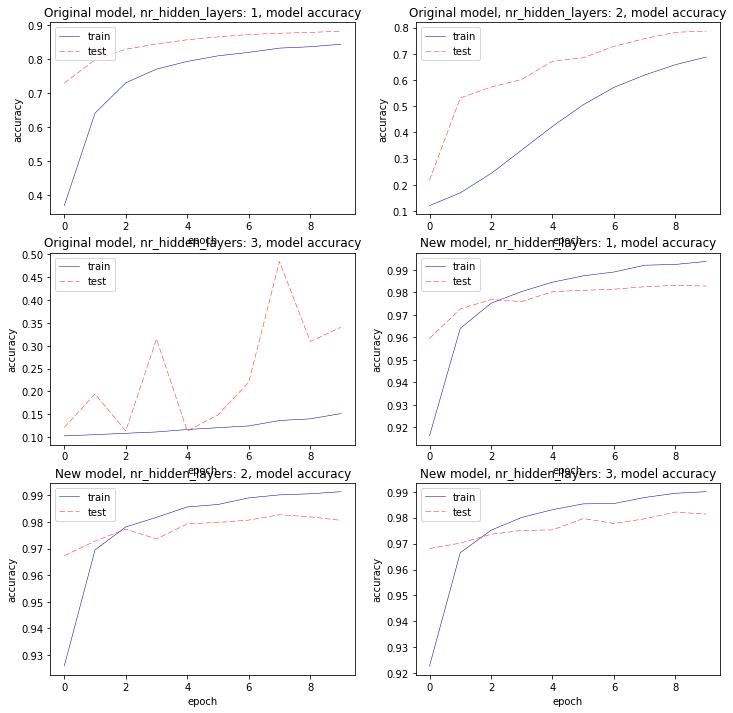

In [43]:
# Build plots
fig = plt.figure(figsize=(12, 12))

# Training (You don't need to change this part of the code)
for i, (title, model) in enumerate(models):
    print(title)
    history = model.fit(X_train, Y_train,
                        batch_size=batch_size, nb_epoch=nb_epoch,
                        verbose=0, validation_data=(X_test, Y_test))
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])

    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    ax = fig.add_subplot(321+i)
    _ = ax.plot(history.history['acc'])
    _ = ax.plot(history.history['val_acc'])
    _ = ax.set_title(title + ', model accuracy')
    _ = ax.set_ylabel('accuracy')
    _ = ax.set_xlabel('epoch')
    _ = ax.legend(['train', 'test'], loc='upper left')

## Convolutional Neural Networks for Filtering (2 points)

Convolutional neural networks are well suited for analyzing images. They can be used to apply various image filtering operations. 

The goal of this exercise is to design a CNN model that applies 2 filters to its input images. The input images are 128x128 RGB color images, encoded as 128x128x3 tensor with floating point value normalized between 0 and 1. The RGB format is such that the pixels address by: [:, :, 0] encode the red pixels of the image, the pixels addressed by [:, :, 1] define the green pixels and pixels addressed by [:, :, 2] define the blue pixels. 

Design a convolutional neural network that will: 
1. Apply the sepia filter to the image
2. Apply Gaussian smoothing to the image

Use the specification of the sepia and the Gaussian filter below. 

You answer should contain:
    - The definition of the architecture of the CNN
        - Number of layers
        - Number of filters per layer
        - Shape of the filter per layer
    - Values of each of the parameters of the CNN when using a 5x5 Gaussian smoothing filter
    - The dimensions of the output image when a 5x5 Gaussian smothing is applied


The sepia effect gives warmth and a feel of vintage to photographs. The sepia filter is defined as:

\begin{equation}
R_o = (R_i * .393) + (G_i *.769) + (B_i * .189)\\
G_o = (R_i * .349) + (G_i *.686) + (B_i * .168)\\
B_o = (R_i * .272) + (G_i *.534) + (B_i * .131)
\end{equation}

Gaussian blurring is an effect that reduces the noise and details in an image. 
Gaussian smoothing filter:
$$G(x, y)=\frac{1}{2\pi\sigma^2}e^{-\frac{x^2+y^2}{2\sigma^2}}$$

- A discretized version of the filter is given by the following table:

<table>
<tr><td>1</td><td>4</td><td>7</td><td>4</td><td>1</td></tr>
<tr><td>4</td><td>16</td><td>26</td><td>16</td><td>4</td></tr>
<tr><td>7</td><td>26</td><td>41</td><td>26</td><td>7</td></tr>
<tr><td>4</td><td>16</td><td>26</td><td>16</td><td>4</td></tr>
<tr><td>1</td><td>4</td><td>7</td><td>4</td><td>1</td></tr>
</table>


- To normalize the filter response, each value should divided by $273$. This is a truncated discretized Gaussian filter with a $\sigma$ of 1.


https://github.com/fchollet/keras/issues/3720
- The definition of the architecture of the CNN  
    $\bf Input \, layer$: Convolutional layer with 3 filters of size 1x1 and stride=1 to apply the Sepia filter. Number of filters = 3 because there are 3 color channels each with different weights for $(R_i, G_i, B_i)$. Filter size=1x1 and stride=1 because we want to calculate $R_o, G_o, B_o$ per pixel.   
    $\bf Second \, layer$: Convolutional layer with 3 filters of size 5x5 and stride=1 for Gaussian filter. Use border_mode="same" so filters go "outside" the image by filter_size/2 for edge pixels. Use the normalized Gaussian kernel as a custom kernel initializer i.e.
$$\frac{1}{273} \cdot\begin{bmatrix}
1&4&7&4&1\\
4&16&26&16&4\\
7&26&41&26&7\\
4&16&26&16&4\\
1&4&7&4&1\\
\end{bmatrix}$$
    $\bf Output \, layer$: A fully-connected (dense) layer of size=3 with Identity activation function.
- Values of each of the parameters of the CNN when using a 5x5 Gaussian smoothing filter  
    Number of filters=3, kernel size=(5, 5), border mode="same", strides=1
- The dimensions of the output image when a 5x5 Gaussian smoothing is applied: 128x128x3. The specified filters do not and technically should not change the dimensions of the image at all.

## Model Design (2 Points)

Various decisions need to be made in a modeling process to address specific properties of the data and the modeling goal. In this task, you are given a description of a data structure and a goal for which you need to design a model. 

Produce a figure depicting your model. Briefly explain the figure and justify all decisions made in the modeling process. In detail, describe at least: 
- Input data format
- Number of layers
- Type of layers (Dense, Recurrent, Convolutional - 1D, 2D, 3D)
- Regularization
- Model output
- Loss function

The training and execution procedures for the model may differ, so you can use different descriptions for both. 

*Data and goal description:*

The goal of this task is to generate captions for short video clips. 

The video data is structured as sequences of color images. The model needs to be able to process a number of consecutive images that form a short video clip. The training data consists of video clips (few seconds) and a short caption (5-10 words). 

For simplicity, the accuracy of the model is evaluated on the exact prediction of the caption. In other words, the model needs to produce correctly the specific words in a specific order for each video. 

## MNIST Calculator (5 points)

During the lectures you have seen a CNN model that can be successfully trained to classify the MNIST images. You have also seen how a RNN model that can be trained to implement addition of two numbers. 

Using the KERAS (or TensorFlow) library, design and train a model that can learn how to add numbers directly from the MNIST image data. More specifically, the model should input a sequence of a set of images and produces a cumulative sum of the numbers represented by the digits in the images.

For example:

Input 1: ![294](images/294.png)

Input 2: ![61](images/61.png)

Output: 355

In [27]:
class CharacterTable(object):
    '''
    Given a set of characters:
    + Encode them to a one hot integer representation
    + Decode the one hot integer representation to their character output
    + Decode a vector of probabilities to their character output
    '''
    def __init__(self, chars, maxlen):
        self.chars = sorted(set(chars))
        self.char_indices = dict((c, i) for i, c in enumerate(self.chars))
        self.indices_char = dict((i, c) for i, c in enumerate(self.chars))
        self.maxlen = maxlen

    def encode(self, C, maxlen=None):
        maxlen = maxlen if maxlen else self.maxlen
        X = np.zeros((maxlen, len(self.chars)))
        for i, c in enumerate(C):
            X[i, self.char_indices[c]] = 1
        return X

    def decode(self, X, calc_argmax=True):
        if calc_argmax:
            X = X.argmax(axis=-1)
        return ''.join(self.indices_char[x] for x in X)

In [28]:
from keras.datasets import mnist
from keras import backend as K

# (You don't need to change this part of the code)
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
y_train, y_test = y_train.astype('str'), y_test.astype('str')

# input image dimensions
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [39]:
from keras.engine.training import _slice_arrays

# Build training data
TRAINING_SIZE = 4000
DIGITS = 10
chars = '0123456789 '
ctable = CharacterTable(chars, DIGITS)
f = lambda: np.random.choice(X_train.shape[0], 
                             size=np.random.randint(1, DIGITS + 1))
X_new, y_new = [], []
seen = set()

while len(X_new) < TRAINING_SIZE:
    # Get indices of random digits for two numbers
    a, b = f(), f()
    
    # Get the images of the corresponding random digits
    x1, x2 = X_train[a], X_train[b]
    y1, y2 = int(''.join(y_train[a])), int(''.join(y_train[b]))
    data = (y1, y2)
    if data in seen:
        continue
    seen.add(data)
    
    # Pad the data with null images
    x1.resize((DIGITS, *x1.shape[1:]))
    x2.resize((DIGITS, *x1.shape[1:]))
    
    # Append the images data
    X_new.append([x1, x2])
    
    # Append the answer
    ans = str(y1 + y2)
    # Answers can be of maximum size DIGITS + 1
    ans += ' ' * (DIGITS + 1 - len(ans))
    y_new.append(ctable.encode(ans, maxlen=DIGITS+1))

# Save memory
del seen, x1, x2, data, y1, y2

X_new, y_new = np.array(X_new), np.array(y_new)

# Shuffle (X_new, y_new) in unison as the later parts of X_new 
# will almost all be larger digits
indices = np.arange(len(y_new))
np.random.shuffle(indices)
X_new = X_new[indices]
y_new = y_new[indices]

# Save memory!
del indices

# Explicitly set apart 10% for test data that we never train over
split_at = int(len(X_new) - len(X_new) / 10)
(X_train_new, X_test_new) = (_slice_arrays(X_new, 0, split_at), 
                             _slice_arrays(X_new, split_at))
(y_train_new, y_test_new) = (y_new[:split_at], y_new[split_at:])

# Save memory!!
del X_new, y_new

print(X_train_new.shape, y_train_new.shape)
print(X_test_new.shape, y_test_new.shape)

(3600, 2, 10, 28, 28, 1) (3600, 11, 11)
(400, 2, 10, 28, 28, 1) (400, 11, 11)


In [41]:
# (You don't need to change this part of the code)
from __future__ import print_function
import numpy as np
np.random.seed(1234)

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import recurrent, Conv2D, MaxPooling2D
from keras.layers import Reshape, Flatten, RepeatVector
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.wrappers import TimeDistributed

RNN = recurrent.SimpleRNN
HIDDEN_SIZE = 128
BATCH_SIZE = 200

# Build the model
print('Build model...')
model = Sequential()

# Rehshape the input for the image identification layers
model.add(Reshape((-1, *X_train_new.shape[-3:]), 
                  input_shape=X_train_new.shape[1:],
                  batch_input_shape=(BATCH_SIZE,)+X_train_new.shape[1:]))

# Image identification
model.add(TimeDistributed(Conv2D(32, kernel_size=(3, 3))))
model.add(Activation('relu'))
model.add(TimeDistributed(Conv2D(64, kernel_size=(3, 3))))
model.add(Activation('relu'))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))

# Reshape the input for RNN
model.add(Reshape((*X_train_new.shape[1:3], -1)))
model.add(TimeDistributed(Flatten()))

# Learning to add numbers in images
model.add(RNN(HIDDEN_SIZE))
model.add(RepeatVector(DIGITS + 1))
model.add(RNN(HIDDEN_SIZE, stateful=False, return_sequences=True))

# For each of step of the output sequence, decide which 
# character should be chosen
model.add(TimeDistributed(Dense(len(chars))))
model.add(Activation('softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])
[(x.input_shape, x.name, x.output_shape) for x in model.layers]

Build model...


[((200, 2, 10, 28, 28, 1), 'reshape_23', (200, 20, 28, 28, 1)),
 ((200, 20, 28, 28, 1), 'time_distributed_56', (200, 20, 26, 26, 32)),
 ((200, 20, 26, 26, 32), 'activation_34', (200, 20, 26, 26, 32)),
 ((200, 20, 26, 26, 32), 'time_distributed_57', (200, 20, 24, 24, 64)),
 ((200, 20, 24, 24, 64), 'activation_35', (200, 20, 24, 24, 64)),
 ((200, 20, 24, 24, 64), 'time_distributed_58', (200, 20, 12, 12, 64)),
 ((200, 20, 12, 12, 64), 'reshape_24', (200, 2, 10, 9216)),
 ((200, 2, 10, 9216), 'time_distributed_59', (200, 2, 92160)),
 ((200, 2, 92160), 'simple_rnn_23', (200, 128)),
 ((200, 128), 'repeat_vector_12', (200, 11, 128)),
 ((200, 11, 128), 'simple_rnn_24', (200, 11, 128)),
 ((200, 11, 128), 'time_distributed_60', (200, 11, 11)),
 ((200, 11, 11), 'activation_36', (200, 11, 11))]

In [42]:
# Train the model
nr_epochs = 10
model.fit(X_train_new, y_train_new,
          batch_size=BATCH_SIZE,
          epochs=nr_epochs,
          verbose=0,
          validation_data=(X_test_new, y_test_new))

KeyboardInterrupt: 

In [ ]:
# Evaluation
score = model.evaluate(X_test_new, y_test_new, batch_size=BATCH_SIZE, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#### How we generate training data?
We first load in the original training data set. Each tuple in the MNIST data corresponds to an image of single digit. We need to add two numbers from images. This means we need a set of images corresponding to the digits of each number we are adding. So we start by building a training set in a loop. In each iteration, we first generate 2 sets of random indices. The indices corresponds to random tuples in the original MNIST data. Therefore, the set of indices will produce a set of images for each digit of one number. We assume numbers can have variable length but have a maximum size of 10 digits. If a number has fewer digits, it is padded with null images. The output training set has the dimension: (nr_samples, 2, 10, 28, 28, 1) where nr_samples is the number of samples, 2 for a sequence of two input numbers, 10 for the number of digits per number, (28, 28, 1) for the dimensions of the image itself.

#### What does the output look like?
The test data contains for each tuple, the string of the sum of the corresponding two numbers padded with spaces up to a maximum size of 11 characters because the sum of two numbers can have maximum 11 digits. The string is also encoded using the character table. The dimensions of the test data is (nr_samples, 10, 11, 11) where the first two is self-explanatory. (11, 11) because we have encoded the string for 10 digits and a space character.

#### How the model works?
We have built one model that is trained end-to-end. First it reshapes the input such that each image is passed to the convolutional layers individually. Then two convolutional layers are used in a time ditributed manner to extract their features. The image features are max pooled to reduce size. We used the ReLu activation functions for both. The reasoning for this choice is given in our answer to question 2.

For the RNN, we have to again reshape the input into the following format (nr_samples, nr_timesteps, input_dims). So we applied reshape and flattened the input. Two RNN layers are applied. The first RNN layer converts each sequence into a set of features of size HIDDEN_SIZE. Then a repeat vector is applied to repeat the input 11 times to get it closer to the output shape. The repeat vector is purely used to only change dimensions and does not affect the result in any way. The second RNN layer also learns new features and returns a sequence. This sequence is passed through a fully connected layer to materialize a single character output per time step of the sequence.

We used the Adam optimizer and again the reasoning is given in our asnwer to question 2.